In [2]:
import numpy as np
from scipy.sparse.linalg import eigs
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN

In [3]:
X_train = np.genfromtxt('../data/faces/X_train.csv', delimiter=',')

# Visualizaing Eigenfaces

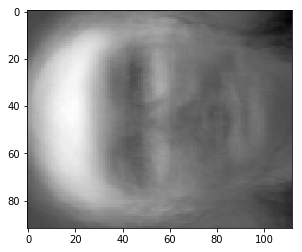

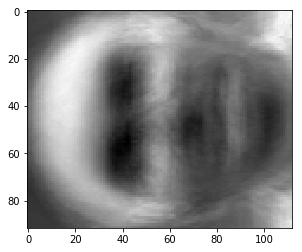

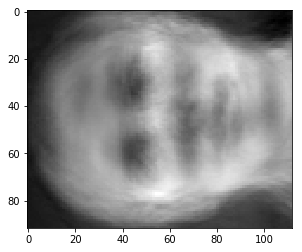

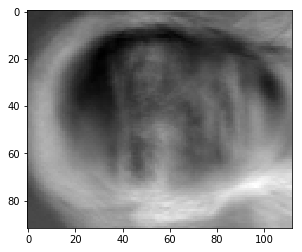

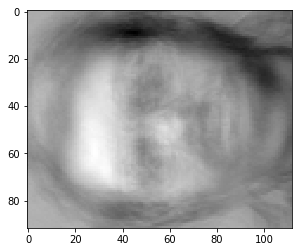

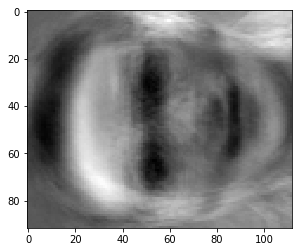

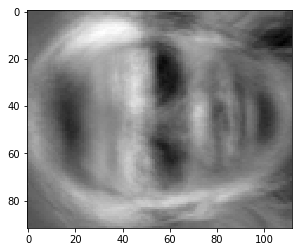

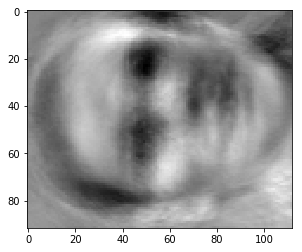

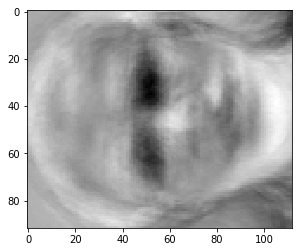

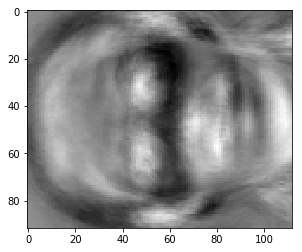

In [4]:
x_mean = np.mean(X_train, axis=0)
X = X_train - x_mean
cov = np.cov(X, rowvar=False)
w, v = eigs(cov, k=50)
v = v.real
for i in range(10):
    plt.figure()
    plt.imshow(np.reshape(v[:, i], (92, 112)), cmap="gray")

# Face Reconstruction

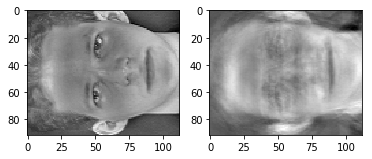

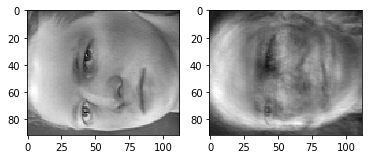

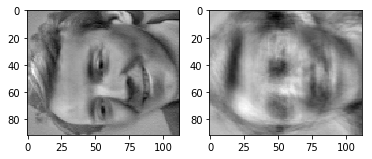

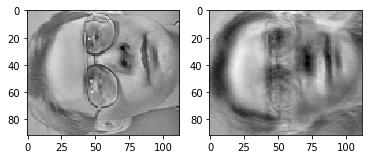

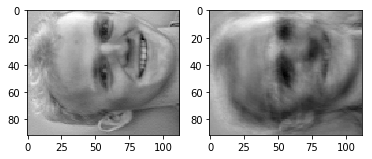

In [5]:
X__ = X @ v
X_ = X @ v @ v.T
indices = [1, 5, 20, 30, 40]
for i in indices:
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(np.reshape(X[i-1, :], (92, 112)), cmap="gray")
    ax[1].imshow(np.reshape(X_[i-1, :], (92, 112)), cmap="gray")
    

# Face Recognition

In [6]:
X_test = np.genfromtxt('../data/faces/X_test.csv', delimiter=',')
y_train = np.genfromtxt('../data/faces/y_train.csv', delimiter=',')
y_test = np.genfromtxt('../data/faces/y_test.csv', delimiter=',')
x_mean = np.mean(X_test, axis=0)
Z = X_test - x_mean
Z__ = Z @ v

In [7]:
clf = KNN(n_neighbors=1)
clf.fit(X__, y_train)
print(clf.score(Z__, y_test))

0.95
